In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

We want to minimize the function, 
$$g = z^\alpha g^\alpha(x^\alpha) + z^\beta g^\beta(x^\beta) + Az^\alpha z^\beta$$
Subject to: 
$$z^\alpha + z^\beta = 1$$
$$z^\alpha x^\alpha + z^\beta x^\beta = X$$
$$0 \leq z^\alpha, z^\beta, x^\alpha , x^\beta, X \leq 1$$

Under the assumption that the free energies can be described by parabolic functions we examine the form, 
$$g^\alpha(x^\alpha) = a_\alpha (x^\alpha - x_0^\alpha)^2 + b_\alpha$$
$$g^\beta(x^\beta) = a_\beta (x^\beta - x_0^\beta)^2 + b_\beta$$

Where, $a_\alpha, a_\beta, b_\alpha,b_\beta, x_0^\alpha, x_0^\beta$ are known. 

By substituting the equality constraints, we look to minimize, 
$$g = z^\alpha g^\alpha(x^\alpha) + (1- z^\alpha) g^\beta(x^\beta) + Az^\alpha (1 - z^\alpha)$$
Subject to: 
$$z^\alpha = \frac{X - x^\beta}{x^\alpha - x^\beta}$$
$$0 \leq z^\alpha, z^\beta, x^\alpha , x^\beta, X \leq 1$$


$$\textbf{Numerical}$$

In [2]:
def two_phase_optimization(x_α_0,x_β_0,a_α,a_β,b_α,b_β,A,X):
    def objective(sol):
        x_α,x_β,z_α = sol[0],sol[1],sol[2]
        g_α = a_α*(x_α-x_α_0)**2 + b_α
        g_β = a_β*(x_β-x_β_0)**2 + b_β
        return z_α*g_α + (1-z_α)*g_β + A*z_α*(1-z_α)

    def constraint7(sol):
        x_α,x_β,z_α = sol[0],sol[1],sol[2]
        return X - z_α*x_α - (1-z_α)*x_β  

    con1 = {'type':'ineq', 'fun': lambda sol: sol[0]}
    con2 = {'type':'ineq', 'fun': lambda sol: 1-sol[0]}
    con3 = {'type':'ineq', 'fun': lambda sol: sol[1]}
    con4 = {'type':'ineq', 'fun': lambda sol: 1-sol[1]}
    con5 = {'type':'ineq', 'fun': lambda sol: sol[2]}
    con6 = {'type':'ineq', 'fun': lambda sol: 1-sol[2]}
    con7 = {'type':'eq', 'fun': constraint7}
    cons = [con1,con2,con3,con4,con5,con6,con7]

    guess = [.2,.6,.2]

    sol = minimize(objective,guess,method = 'SLSQP',constraints = cons,\
                  tol = 1e-8)
    #return [x_α,x_beta,z_α],[objective value]
    return sol.x,sol.fun

In [3]:
x_α_0,x_β_0 = .25,.75
a_α,a_β = 10,10
b_α,b_β = 2,2

num_error = 1e-7
X_grid = np.linspace(num_error,1 - num_error,100)
A_grid = np.linspace(0,3,40)
feasible_points_X,feasible_points_A = [],[]

for i in X_grid:
    for j in A_grid: 
        minimum_points = two_phase_optimization(x_α_0,x_β_0,a_α,a_β,b_α,b_β,j,i)[0]
        if minimum_points[2] < 1 - num_error and minimum_points[2] > num_error:
            feasible_points_X.append(i)
            feasible_points_A.append(j)

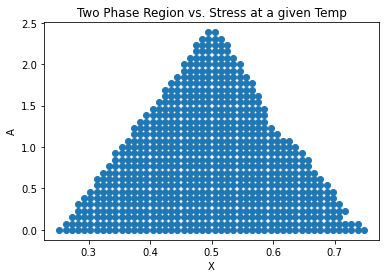

In [4]:
plt.scatter(feasible_points_X,feasible_points_A)
plt.xlabel('X')
plt.ylabel('A')
plt.title('Two Phase Region vs. Stress at a given Temp')
plt.show()

$$\textbf{Symbolic}$$

Method of Lagrange multipliers

$\textbf{Minimize}$
\begin{align*}
l(z^\alpha,z^\beta,x^\alpha,x^\beta,\lambda) &=  z^\alpha g^\alpha(x^\alpha) +(1-z^\alpha)g^\beta(x^\beta)+ A z^\alpha (1-z^\alpha) \\
&\quad - \lambda( (z^\alpha x^\alpha +(1-z^\alpha)x^\beta - X)
\end{align*}

$\textbf{Subject to}$\
$$ 0 \leq z^\alpha,z^\beta,z^\alpha+z^\beta, x^\alpha,x^\beta,X \leq 1$$

Finding the partial derivatives with respect to all variables we get the following equations, 
\begin{align*}
    \frac{\partial l}{\partial z^\alpha} &=  g^\alpha(x^\alpha) - g^\beta(x^\beta) + A(1 - 2z^\alpha) - \lambda(x^\alpha + x^\beta) = 0\\
        \frac{\partial l}{\partial x^\alpha} &=  z^\alpha(\frac{d g^\alpha}{d x^\alpha} - \lambda) = 0\\
    \frac{\partial l}{\partial x_1^\beta} &= (1-z^\alpha)(\frac{d g^\beta}{d x^\beta} - \lambda) = 0\\
    \frac{\partial l}{\partial \lambda} &= z^\alpha x^\alpha +(1 - z^\alpha) x^\beta - X = 0
\end{align*}

In which the objective value comes in the form, 
\begin{align*}
& 1. g^\alpha(X) \implies z^\alpha = 1 \\
& 2. g^\beta(X) \implies z^\alpha = 0\\
& 3. \frac{d g^\alpha}{d x^\alpha} = \frac{d g^\beta}{d x^\beta} = \frac{g^\alpha(x^\alpha) - g^\beta(x^\beta) + A(1 - 2z^\alpha)}{x^\alpha - x^\beta} \implies z^\alpha = \frac{X - x^\beta}{x^\alpha - x^\beta}
\end{align*}

In [84]:
import sympy as sy
sy.init_printing()

x_α, x_β, z_α, lam, a, b, x_α_0, x_β_0, A, X = sy.symbols('x^α x^β z^α lam a b x_0^α x_0^β A X')

answer = sy.solve((a*(x_α-x_α_0)**2 - a*(x_β-x_β_0)**2 + A - 2*A*z_α +lam*(x_α-x_β),
         2*a*z_α*(x_α-x_α_0) + lam*z_α,
         2*a*(1-z_α)*(x_β-x_β_0) + lam*(1-z_α),
         z_α*x_α + (1-z_α)*x_β - X), [x_α,x_β,z_α,lam])

In [85]:
#solution 1 (same as solution 2) - In the form g^α(X)
solution1 = sy.simplify(answer[0][2]*(a*(answer[0][0]-x_α_0)**2+b) + (1-answer[0][2])*(a*(answer[0][1]-x_β_0)**2 +b) + A*answer[0][2]*(1-answer[0][2]))
solution1

In [86]:
#solution 4 (same as solution 5) - In the form g^β(X)
solution4 = sy.simplify(answer[3][2]*(a*(answer[3][0]-x_α_0)**2+b) + (1-answer[3][2])*(a*(answer[3][1]-x_β_0)**2 +b) + A*answer[3][2]*(1-answer[3][2]))
solution4

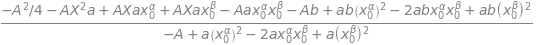

In [87]:
#wanted solution - Two phase solution 
wanted_solution = sy.simplify(answer[2][2]*(a*(answer[2][0]-x_α_0)**2+b) + (1-answer[2][2])*(a*(answer[2][1]-x_β_0)**2 +b) + A*answer[2][2]*(1-answer[2][2]))
wanted_solution

In [88]:
#First boundary where two phase solution exists
boundary_1 = sy.solve(wanted_solution - solution1, [A])
boundary_1[0]

In [89]:
#Second boundary where two phase solution exists
boundary_2 = sy.solve(wanted_solution - solution4, [A])
boundary_2[0]

In [90]:
boundary_one = sy.lambdify([a,X,x_α_0,x_β_0],boundary_1[0])
boundary_two = sy.lambdify([a,X,x_α_0,x_β_0],boundary_2[0])

In [93]:
def check(A,a,X,x_α_0,x_β_0):
    if A <= boundary_one(a,X,x_α_0,x_β_0) and A <= boundary_two(a,X,x_α_0,x_β_0):
        return True
    else:
        return False

X_grid = np.linspace(num_error,1 - num_error,100)
A_grid = np.linspace(0,3,40)
# A = np.linspace(0,1,200)
# X = np.linspace(0,1,200)
a, b, x_α_0, x_β_0 = 10, 2, .25, .75
feasible_points_X,feasible_points_A = [],[]

for i in X_grid:
    for j in A_grid: 
        if check(j,a,i,x_α_0,x_β_0):
            feasible_points_A.append(j)
            feasible_points_X.append(i)

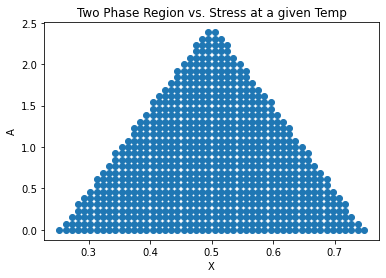

In [94]:
plt.scatter(scatter_X,scatter_A)
plt.xlabel('X')
plt.ylabel('A')
plt.title('Two Phase Region vs. Stress at a given Temp')
plt.show()